<div style="text-align: left;">
<table style="width:100%; background-color:transparent;">
  <tr style="background-color:transparent;">
    <td style="background-color:transparent;"><a href="http://www.datascience-paris-saclay.fr">
<img border="0" src="http://project.inria.fr/saclaycds/files/2017/02/logoUPSayPlusCDS_990.png" width="90%"> </td>
     
  </tr>
</table> 
</div>

<center><h1>FIFA Players Potential prediction challenge</h1></center>
<br/>
<center>Master2 Data Science Students: Jiabin CHEN, Chuanyuan QIAN, Qin WANG</center>

## Table of Contents

0. [Introduction](#Introduction)
1. [Data](#Data)
2. [Score metric](#Score-metric)
3. [Data exploration](#Data-exploration)
4. [Predictions](#Predictions)
5. [Submissions](#Submissions)

![FIFA20](https://www.fifplay.com/img/public/fifa-20-logo.png)

# Introduction

The challenge is for football⚽️⚽️⚽️ enthusiasts who love data science and FIFA game🎮🎮🎮. The data is scraped using this [crawler](https://github.com/amanthedorkknight/fifa18-all-player-statistics/blob/master/crawler.ipynb) from the website https://sofifa.com by extracting the Player personal data, followed by Player IDs and their playing and style statistics.

Why we choose this dataset as a data challenge ? One of the most important tasks for a football club manager is to discover talent players, especially young players with high career potential. We want to build a regression model to predict the player's potential based on his statistical data in FIFA20 Game. Insights and correlations among players' potential, age and skills rating can be derived from the dataset. Indeed, even though some of features values are virtual and given by experts based on performance in reality over past few years, we can extend easily our regression model once we have collected some realistic data, such as the number of goals, assists, win games, etc. We have derived summary statistics and provided a very simple baseline in following sections.



# Aim

The predictive aim of this challenge is to use `fifa_train.csv` to predict the potential for each player based on his age, nationality, club, marketing value, position and many other football skills rating. 

# Data

## Players Personal Data in FIFA Game

Each row represents one player statistics measured based on his performance over past years and the following information is provided in the columns:

* `Name` - the name of the player
* `Age` - the age of the player
* `Club` - the current football club of the player
* `Nationality` - the nationality of the player
* `Value`, `Wage` - current market value and wage
* `Preferred Foot` - left or right,  `Body Type`
* `Position` - position in the pitch
* `Joined` - the date of joining current club
* `Loaned From` - the loaded club name in case that the player is loaded from
* `Release Clause` - a clause in a contract that imposes an obligation on another club wishing to acquire the services of the player
* `Contract Valid Until` - contract end date 
* `Height`, `Weight` - height and weight of player
* `International Reputation`, `Weak Foot`, `Skill Moves` - rating on scale of 1-5

* `Crossing`, `Finishing`, `HeadingAccuracy`, `ShortPassing`,
    `Volleys`, `Dribbling`, `Curve`, `FKAccuracy`, `LongPassing`,
    `BallControl`, `Acceleration`, `SprintSpeed`, `Agility`, `Reactions`,
    `Balance`, `ShotPower`, `Jumping`, `Stamina`, `Strength`, `LongShots`,
    `Aggression`, `Interceptions`, `Positioning`, `Vision`, `Penalties`,
    `Composure`, `Marking`, `StandingTackle`, `SlidingTackle`, `GKDiving`,
    `GKHandling`, `GKKicking`, `GKPositioning`, `GKReflexes` - different skills rating on scale of 1-100

For example, the following image is the statistics of Messi presented in website.

![image](https://raw.githubusercontent.com/amanthedorkknight/fifa18-all-player-statistics/master/images/detailspage.png)

# Score metric

In this challenge we use Mean Absolute Error as metrics:

$$score =  \frac{1}{n} \sum_{i=1}^{n} | y_{i} - \hat{y_i} |$$ where $y_i$ is the true value of $i$-th sample and $\hat{y_i}$ is the prediction for this sample.

Score signifies that average distance between prediction and true value, hence a lower score is better,


# Data exploration 

In [53]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('bmh')                    

In [41]:
'''plotly Visualization'''
import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected = True)

'''Display markdown formatted output like bold, italic bold etc.'''
from IPython.display import Markdown

In [42]:
# Load train dataset
data = pd.read_csv('./data/fifa_train.csv', index_col=0)

In [56]:
'''Function to distribution plot'''
def distplot(variable, color):
    global ax
    font_size = 16
    title_size = 20
    plt.rcParams['figure.figsize'] = (18, 7)
    ax = sns.distplot(variable, color = color)
    plt.xlabel('%s' %variable.name, fontsize = font_size)
    plt.ylabel('Count of the Players', fontsize = font_size)
    plt.xticks(fontsize = font_size)
    plt.yticks(fontsize = font_size)
    plt.title('%s' %variable.name + ' Distribution of Players', fontsize = title_size)
    plt.show()

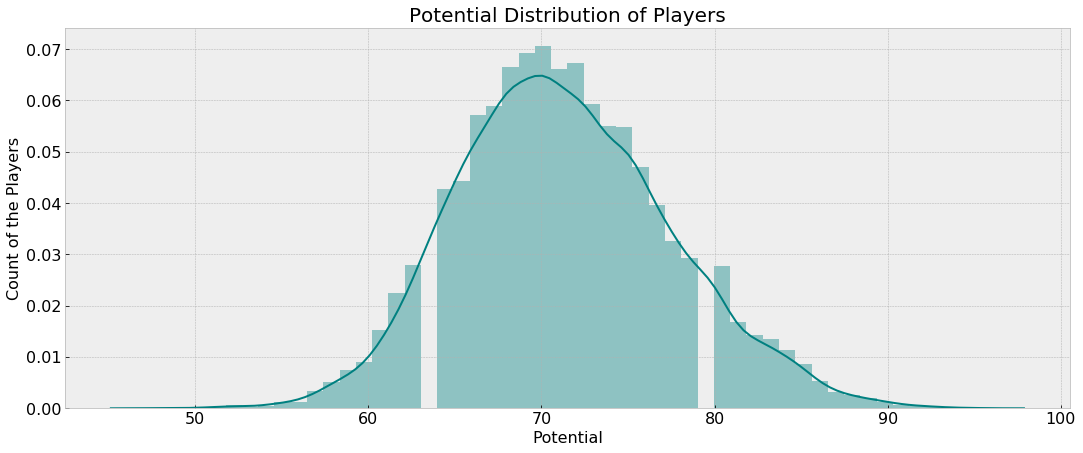

In [57]:
'''Distribution of the Potential of the players'''
distplot(data['Potential'], 'teal')

We observed that the distribution of players' potential is approximately Gaussians.

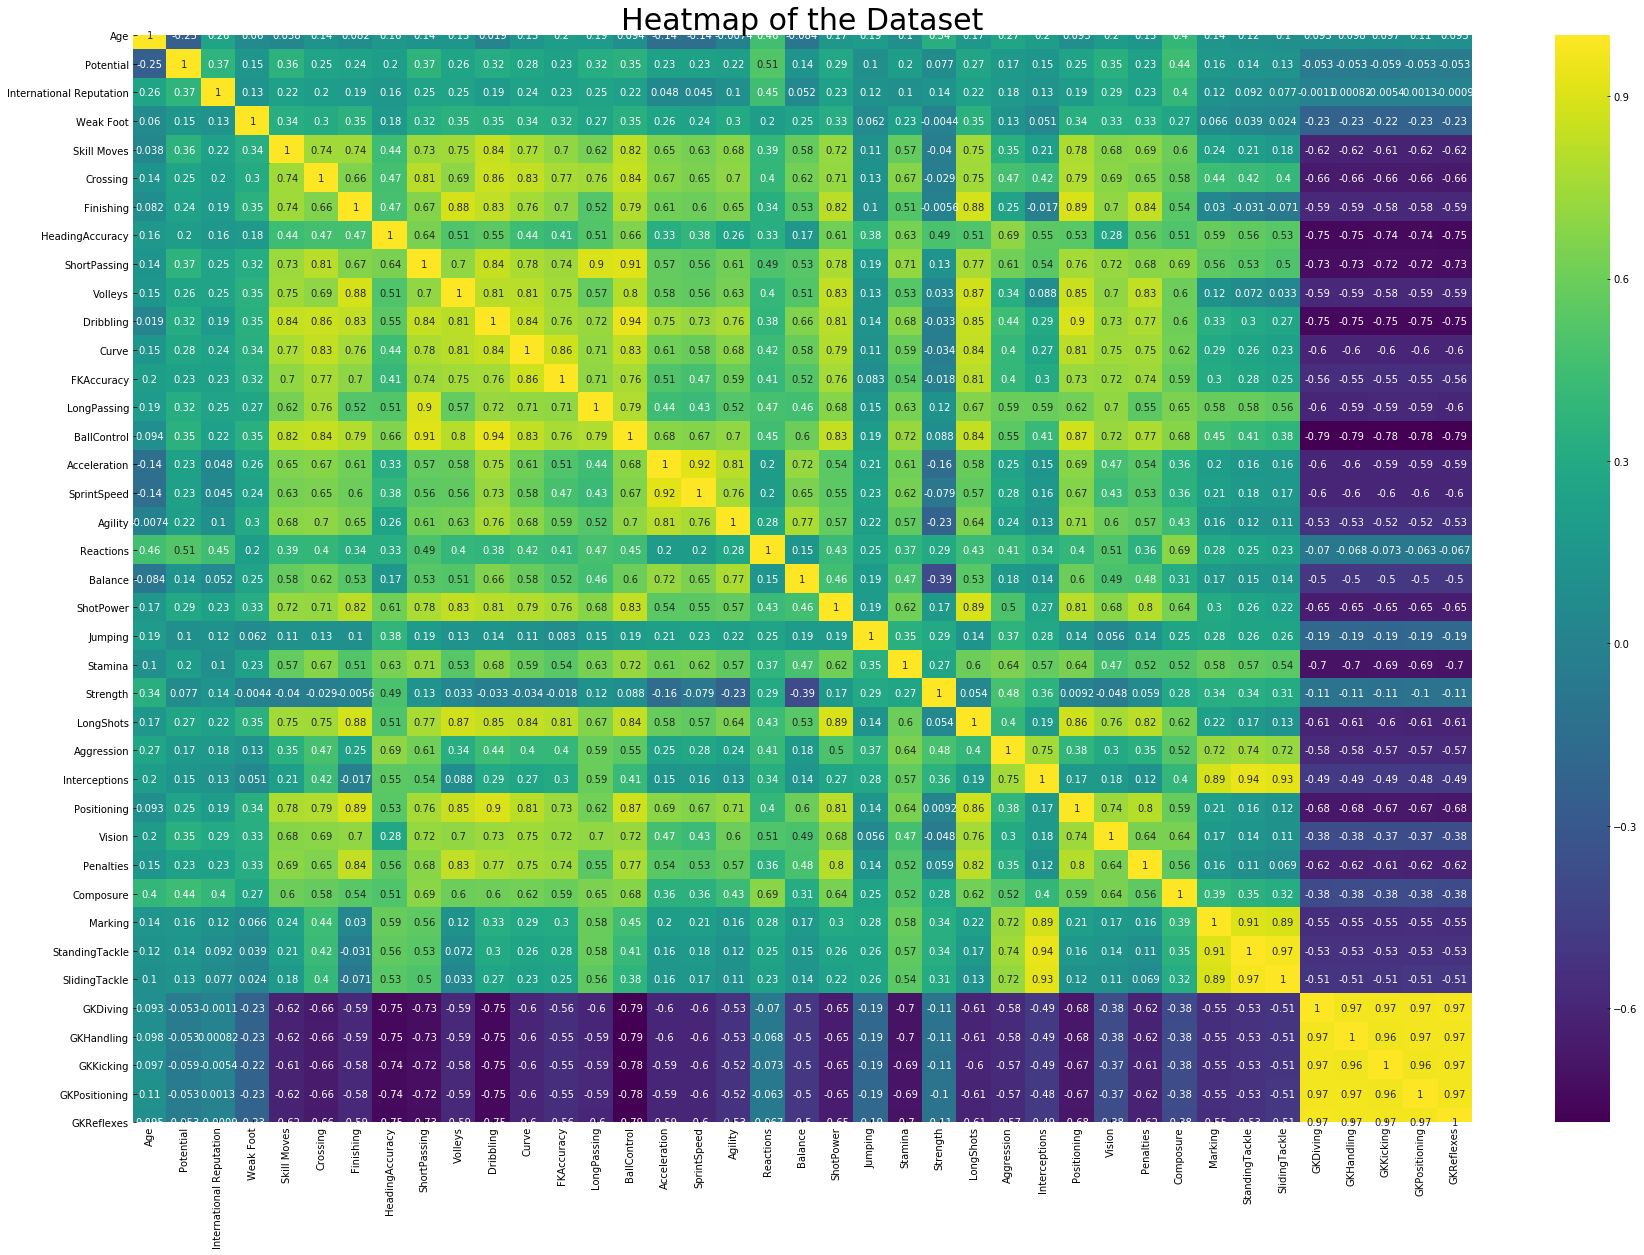

In [89]:
''' Plotting a correlation heatmap'''
plt.rcParams['figure.figsize'] = (30, 20)
sns.heatmap(data.drop(['ID', 'Jersey Number'], axis=1).corr(), annot = True, cmap = 'viridis')
plt.title('Heatmap of the Dataset', fontsize = 30)
plt.show()

In [49]:
'''Plot regression plot to see how Potential is correlated with numerical variables.'''
corr_num = data.loc[:, ['Value', 'Wage', 'Height', 'Weight']]
for i in corr_num.columns:
    x = corr_num[i]
    y = data['Potential']
    
    # Creating the dataset and generating the plot
    trace = go.Scatter(
                       x = x,
                       y = y,
                       mode = 'markers',
                       marker = dict(color = 'green'))
    
    # Layout for regression plot
    title = '{} vs Potential'.format(corr_num[i].name)
    layout = go.Layout(title = title, yaxis = dict(title = 'Potential'))
    
    fig = go.Figure(data = trace, layout = layout)
    iplot(fig)


Now we look at the relationship between players' potential and some categorical features 

In [90]:
'''Create boxplots to see the association between categorical and Rating variables.'''
corr_cat = data.loc[:, ['Preferred Foot', 'International Reputation', 'Position', 'Age']]
for i in corr_cat.columns:
    trace = go.Box(
                   x = corr_cat[i],
                   y = data['Potential'],
                   marker = dict(color = 'teal'))
    layout = go.Layout(title = '{} vs Potential'. format(i), yaxis = dict(title = 'Potential'))
    fig = go.Figure(data = trace, layout = layout)
    iplot(fig)

The figures above show that international reputation and age are correlated with players' potential but position in the pitch and preferred foot are not. This is a pretty reasonable result.

Here we plot the average potential of players in the same country. We found that France, Spain, Germany, Brazil, Argentina have higher average potential while China and some Asian countries have a poor result  🤣🤣🤣🤣🤣🤣

In [45]:
'''Ploting the location based on Potential'''
potential = pd.DataFrame(data.groupby(['Nationality'])['Potential'].mean().reset_index())
count = pd.DataFrame(potential.groupby('Nationality')['Potential'].mean().reset_index())

trace = [go.Choropleth(
            colorscale = 'plasma',
            locationmode = 'country names',
            locations = count['Nationality'],
            text = count['Nationality'],
            z = count['Potential'],
            reversescale=True)]

layout = go.Layout(title = 'Country vs Potential')

fig = go.Figure(data = trace, layout = layout)
py.iplot(fig)

Moreover, we explored the effect of clubs. For example, we picked Real Madrid, Barcelona, Paris Saint-German, etc, the most successful club over past few years, and some less famous clubs, as Fiorentina, FC Tokyo, to plot the potential distribution for these clubs. No surpriseliy, the results tell us that the most famous clubs collected the most talent players.

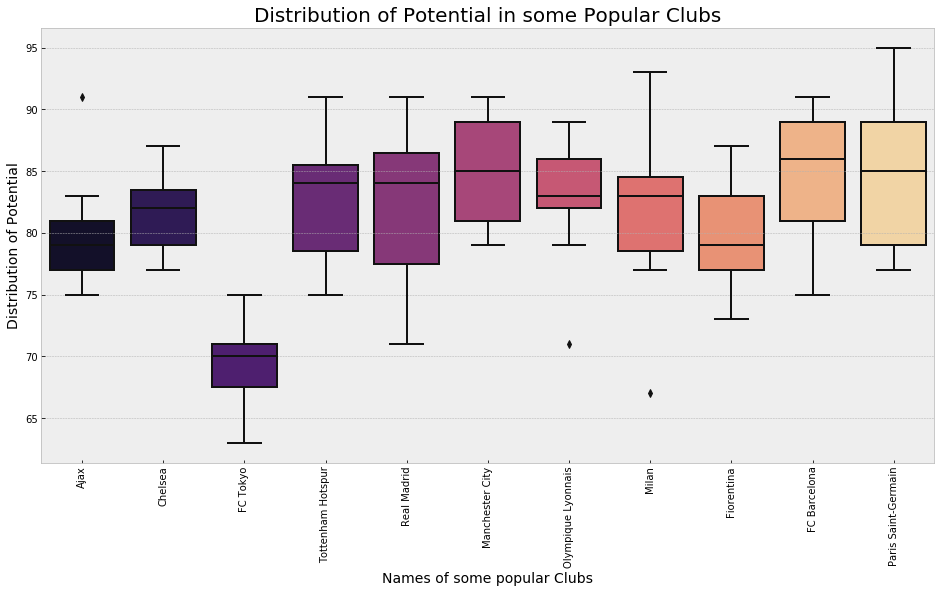

In [82]:
'''Distribution of Potential in some Popular clubs'''
some_clubs = ('Paris Saint-Germain', 'FC Tokyo', 'Ajax', 'Olympique Lyonnais', 'Milan', 'Manchester City',
             'Tottenham Hotspur', 'FC Barcelona', 'Fiorentina', 'Chelsea', 'Real Madrid')

data_club = data.loc[data['Club'].isin(some_clubs) & data['Potential']]

plt.rcParams['figure.figsize'] = (16, 8)
ax = sns.boxplot(x = 'Club', y = 'Potential', data = data_club, palette = 'magma')
ax.set_xlabel(xlabel = 'Names of some popular Clubs', fontsize = 14)
ax.set_ylabel(ylabel = 'Distribution of Potential', fontsize = 14)
ax.set_title(label = 'Distribution of Potential in some Popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

We selected the most potential players who are below 22 years old. The one of meaningful and challenging objective is to discovery the talent young player as early as possible for a football club manager. If we can sign a contract with K.Mbappé and O.Dembélé when they were 18, what a great success🧐🧐🧐 !!! 

In [60]:
''''Top 10 talent youngest player from FIFA 20'''

data[data['Age'] < 22].sort_values('Potential', ascending = False)[['Name', 'Age', 'Club', 'Nationality', 'Potential']].head(10)

Name  Age                 Club  Nationality  Potential
25       K. Mbappé   19  Paris Saint-Germain       France         95
229  G. Donnarumma   19                Milan        Italy         93
155     O. Dembélé   21         FC Barcelona       France         92
156  Gabriel Jesus   21      Manchester City       Brazil         92
226     M. de Ligt   18                 Ajax  Netherlands         91
734      A. Lafont   19           Fiorentina       France         90
228         Arthur   21         FC Barcelona       Brazil         90
415       H. Aouar   20   Olympique Lyonnais       France         90
321      L. Bailey   20  Bayer 04 Leverkusen      Jamaica         89
236         Malcom   21         FC Barcelona       Brazil         89

# Predictions

Here we provided a naive baseline for prediction. We just encode category features as count ordinal encoder and then merge directly with those numerical features. More Sophistic features engineering could be done. The information extracted from features will be fed into a simple Ridge Regression model built in sklearn package.

In [7]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

In [8]:
# a class for Encode categorical features as an integer array using count information

class CountOrdinalEncoder(OrdinalEncoder):

    def __init__(self, categories='auto', dtype=np.float64):
        self.categories = categories
        self.dtype = dtype

    def fit(self, X, y=None):
        """Fit the OrdinalEncoder to X.

        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to determine the categories of each feature.

        Returns
        -------
        self
        """
        super().fit(X)
        X_list = self._check_X(X)
        # now we'll reorder by counts
        for k, cat in enumerate(self.categories_):
            counts = []
            for c in cat:
                counts.append(np.sum(X_list[k] == c))
            order = np.argsort(counts)
            self.categories_[k] = cat[order]
        return self

In [9]:
class FeatureExtractor(object):

    def __init__(self):
        pass

    def fit(self, X_df, y_array):
        pass

    def transform(self, X_df):
        num_cols = ['Age', 'International Reputation', 'Weak Foot', 'Skill Moves',
                           'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
                           'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
                           'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
                           'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
                           'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
                           'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
                           'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']

        cat_cols = ['Preferred Foot',  'Body Type', 'Position']

        drop_cols = ['Name', 'Club', 'Nationality']

        X_selected = X_df[num_cols+cat_cols+drop_cols]

        numeric_transformer = Pipeline(steps=[
            ('impute', SimpleImputer(strategy='median'))])

        cat_encoder = CountOrdinalEncoder()

        preprocessor = ColumnTransformer(
            transformers=[
                ('cat', make_pipeline(SimpleImputer(strategy='constant', fill_value='nan'), cat_encoder), cat_cols),
                ('num', numeric_transformer, num_cols),
                ('drop cols', 'drop', drop_cols+cat_cols)
            ])

        X_array = preprocessor.fit_transform(X_selected)
        return X_array

In [91]:
from sklearn.linear_model import Ridge
from sklearn.base import BaseEstimator
from sklearn.metrics import mean_absolute_error

In [92]:
class Regressor(BaseEstimator):
    def __init__(self, alpha=1.0):
        self.reg = Ridge(alpha=alpha)

    def fit(self, X, y):
        self.reg.fit(X, y)

    def predict(self, X):
        return np.around(self.reg.predict(X))

In [6]:
from problem import get_train_data

X_df, y_array = get_train_data()

Load train data


In [93]:
feature_extractor = FeatureExtractor()
X_precessed = feature_extractor.transform(X_df)

reg = Regressor()
reg.fit(X_precessed, y_array)

In [94]:
error = mean_absolute_error(y_array, reg.predict(X_precessed))
print("Mean Absolute Error over training set: %.4f"%error)

Mean Absolute Error over training set: 2.5839


# Submissions

As required by Ramp workflow, each of your submissions should be in it's own folder within the `submissions` folder (e.g. `submissions/baseline`). The submission directory should contain 2 files:

* `feature_extractor.py` - this is where you do features engineering and data preprocessing 
* `regressor.py` - this should implement a regressor with a `fit()` and `predict()` function

See `submissions/starting_kit` for an example.

You should test your submissions using RAMP-workflow before submitting:

## Local testing (before submission)

We can test our predictive models with command - `ramp_test_submission`. 

First, ensure that `ramp-worflow` is installed (see the [github repo](https://github.com/paris-saclay-cds/ramp-workflow) for installation instructions). 

If you have installed it, then the command will test on files in [`submissions/starting_kit`](/submissions/starting_kit) by default. To specify testing on a different folder use the flag `--submission`. For example to run the test on `submissions/baseline` use: `ramp_test_submission --submission baseline`.

It will run and print training and test errors on each fold.

For example, below we test the starting kit:

In [95]:
!ramp_test_submission --submission starting_kit

Testing fifa_players_potential_prediction
Reading train and test files from ./data ...
Reading cv ...
Training submissions/starting_kit ...
CV fold 0
	score  mean aboslute error      time
	train                 2.61  0.103522
	valid                 2.62  0.070840
	test                  2.60  0.036490
CV fold 1
	score  mean aboslute error      time
	train                 2.61  0.064506
	valid                 2.52  0.081176
	test                  2.55  0.034145
CV fold 2
	score  mean aboslute error      time
	train                 2.58  0.053588
	valid                 2.61  0.084550
	test                  2.57  0.036825
CV fold 3
	score  mean aboslute error      time
	train                 2.49  0.052599
	valid                 2.72  0.081569
	test                  2.56  0.035416
CV fold 4
	score  mean aboslute error      time
	train                 2.63  0.049638
	valid                 2.48  0.083399
	test                  2.55  0.041706
CV fold 5
	score  mean aboslute error      time
	t